In [ ]:
import pandas as pd

# อ่านข้อมูลจากไฟล์ CSV ที่เก็บข้อมูลเซ็นเซอร์ TOF และ Gimbal
df = pd.read_csv('draw_squre2.csv')

# กรองข้อมูลที่มีระยะทาง TOF มากกว่า 0 และน้อยกว่า 500 mm เพื่อกำจัดค่าผิดปกติ
df = df[df['tof_distance']>0]
df = df[df['tof_distance']<1000]

FileNotFoundError: [Errno 2] No such file or directory: 'draw_squre\\square_pid_log.csv'

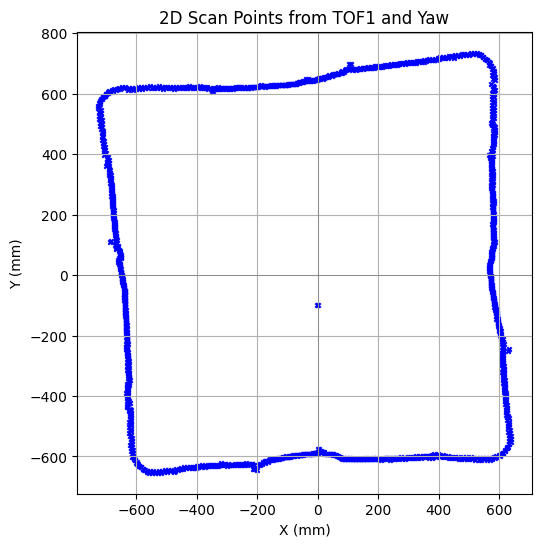

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# เลือกข้อมูลที่มีระยะทาง TOF มากกว่า 0
filtered_df = df[df['tof_distance'] > 0]

# แปลงเป็นเรเดียน
angles_rad = np.radians(filtered_df['yaw_angle'])

# เลือกเฉพาะ ระยะทาง TOF ที่กรองแล้ว
dist_m = filtered_df['tof_distance'] 

# คำนวณตำแหน่ง X, Y ของแต่ละจุด จากมุม Yaw และระยะทาง TOF
# เป็นการคำนวณพิกัดในระบบพิกัดเชิงขั้ว (polar coordinates) (r,θ) ไปยังพิกัดเชิงเส้น (Cartesian coordinates) (x,y) เพื่อแสดงผลเป็นรูปกำแพงได้
x = np.cos(angles_rad) * dist_m # จาก x = r * cos(θ)
y = np.sin(angles_rad) * dist_m # จาก y = r * sin(θ)


# แสดงผลเป็นจุด
plt.figure(figsize=(6, 6))
plt.scatter(y, x, s=10, color='blue',marker='x')
plt.axhline(0, color='gray', linewidth=0.5)
plt.axvline(0, color='gray', linewidth=0.5)
plt.grid()
plt.gca().set_aspect('equal') # เพื่อให้แกน X และ Y มีสเกลเท่ากัน ทำให้กราฟดูไม่บิดเบี้ยว
plt.title("2D Scan Points from TOF1 and Yaw")
plt.xlabel("X (mm)")
plt.ylabel("Y (mm)")
plt.show()